In [41]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import pylab as pl

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-08-03 00:24:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2020-08-03 00:24:01 (1.24 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [42]:
read = pd.read_csv('FuelConsumption.csv')
read.head(10)
read.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [43]:
write = read[['ENGINESIZE','CO2EMISSIONS']]

In [44]:
split = np.random.rand(len(write)) < 0.8 
test = write[split]
train = write[~split]

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

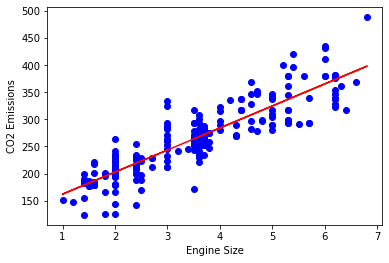

In [46]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.plot(train_x, regr.intercept_ + regr.coef_[0][0]*train_x, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

In [47]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

In [48]:
mae = np.mean(np.absolute(test_y_hat - test_y))
mse = np.mean((test_y_hat - test_y)**2)
print("M.A.E: %2f" % mae)
print("M.S.E: %2f" % mse)
print("R2 Score: %2f" % r2_score(test_y_hat, test_y))

M.A.E: 23.499413
M.S.E: 960.536084
R2 Score: 0.708671


In [49]:
print("The coeffecient is: %2f" % regr.coef_)
print("The intercept is: %2f" % regr.intercept_)

The coeffecient is: 40.618506
The intercept is: 121.688445
